#### _Loading Libraries._

In [41]:
import pandas as pd
import numpy as np

In [42]:
!pip install dmba
!pip install shap
!pip install lime

In [43]:
#loading our usual libraries
import shap

import pandas as pd
import numpy as np


from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                            BaggingClassifier, BaggingRegressor, \
                            GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, \
                            classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
# import scikitplot as skplt

#dmba stuff
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree

# visualization and tuning the aesthetics
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
# plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('font', size = 12)
plt.rc('figure', figsize = (6, 5))

#### _Initialize Colab Environment_

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
%cd /content/drive/MyDrive/Python_Fall24_Final_Project

/content/drive/MyDrive/Python_Fall24_Final_Project


In [46]:
aisles=pd.read_csv('aisles.csv')
departments=pd.read_csv('departments.csv')
# order_products__prior=pd.read_csv('order_products__prior.csv')
orders=pd.read_csv('orders.csv')
products=pd.read_csv('products.csv')


In [47]:
analysis_df=pd.read_csv('analysis.csv')

### _Data Visualization and initial analysis_

#### _HeatMap of Orders By Hour/Day_

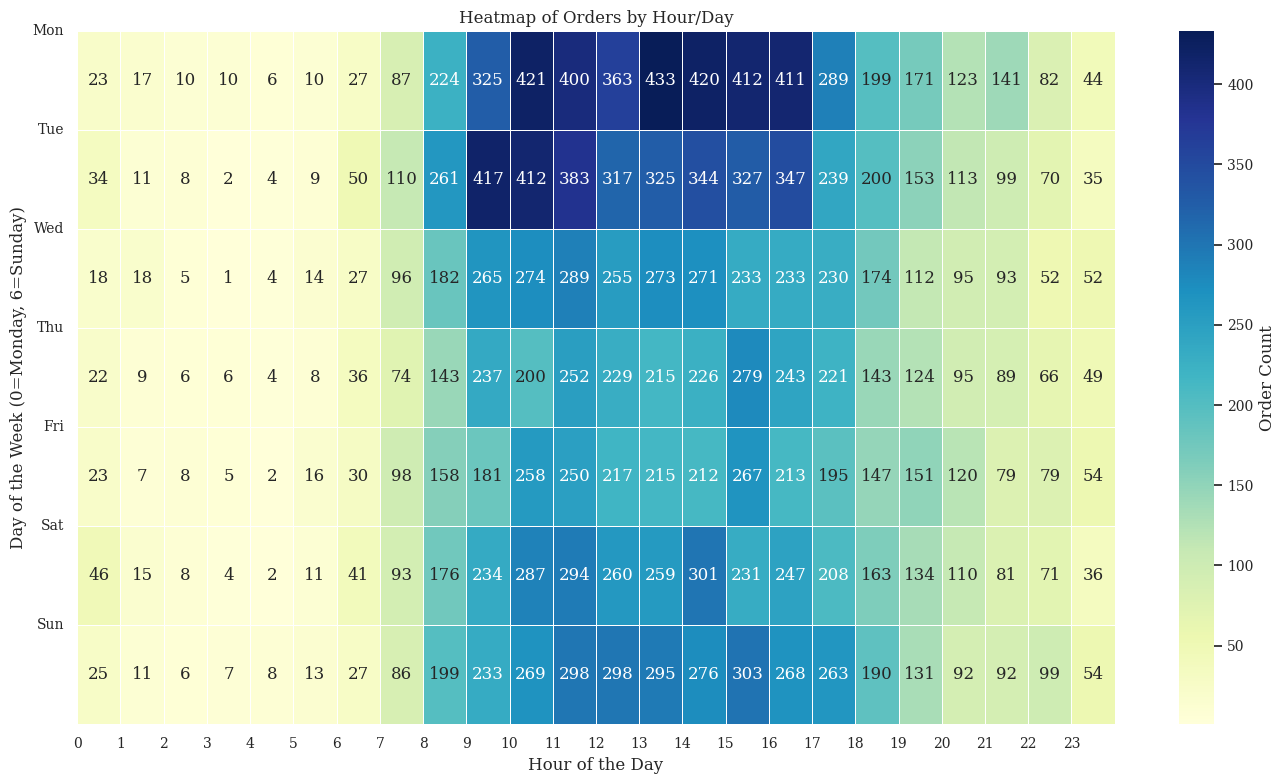

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'order_dow' and 'order_hour_of_day' and count orders
order_counts = analysis_df.groupby(['order_dow', 'order_hour_of_day'])['order_id'].count().reset_index()

#Pivot the data so that 'order_dow' becomes rows and 'order_hour_of_day' becomes columns
order_heatmap_data = order_counts.pivot(index='order_dow', columns='order_hour_of_day', values='order_id')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(order_heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5, cbar_kws={'label': 'Order Count'})

plt.title('Heatmap of Orders by Hour/Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week (0=Monday, 6=Sunday)')
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)])  # Set hour labels (0 to 23)
plt.yticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)  # Adjust day labels if necessary

plt.tight_layout()
plt.show()

<ipython-input-49-e241ce177d65>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_aisle_counts.index, y=top_aisle_counts.values, palette='Blues_d')


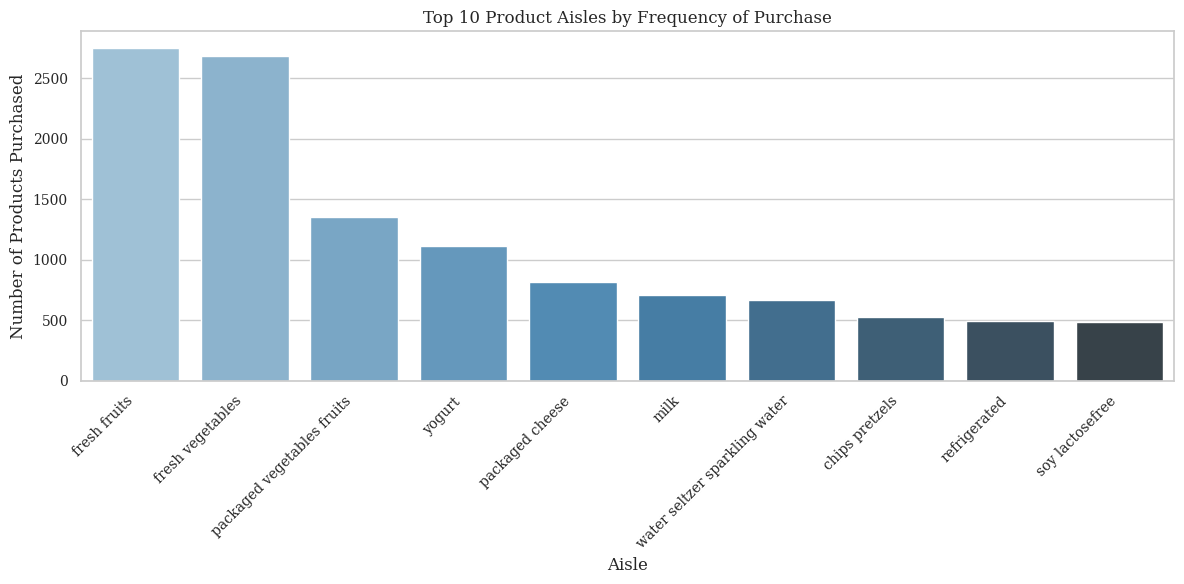

In [49]:
# Get the top 10 aisles
top_aisle_counts = analysis_df['aisle'].value_counts().head(10)

#Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_aisle_counts.index, y=top_aisle_counts.values, palette='Blues_d')

# Add titles and labels
plt.title("Top 10 Product Aisles by Frequency of Purchase")
plt.xlabel("Aisle")
plt.ylabel("Number of Products Purchased")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()



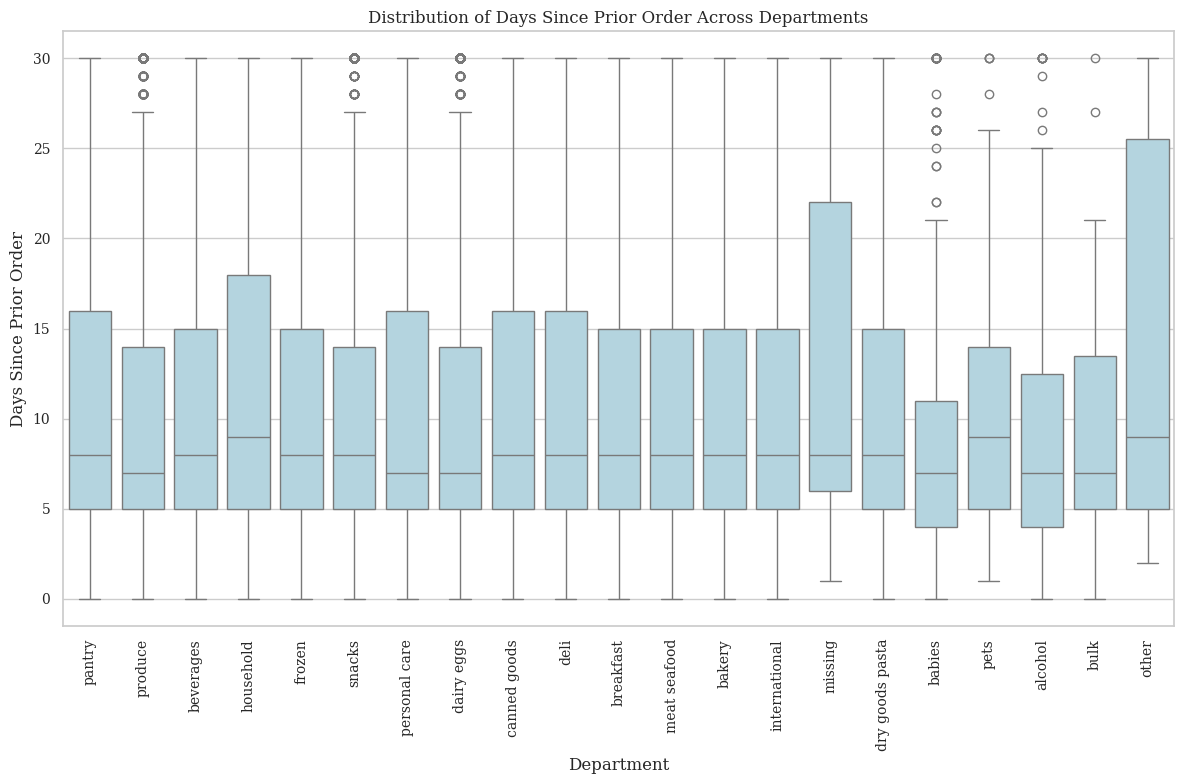

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Let's create the boxplot comparing 'days_since_prior_order' across 'department'
plt.figure(figsize=(12, 8))
sns.boxplot(x='department', y='days_since_prior_order', data=analysis_df, color='lightblue')

# Set title and labels
plt.title('Distribution of Days Since Prior Order Across Departments')
plt.xlabel('Department')
plt.ylabel('Days Since Prior Order')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


##### _Reorderd Ratio by Department_

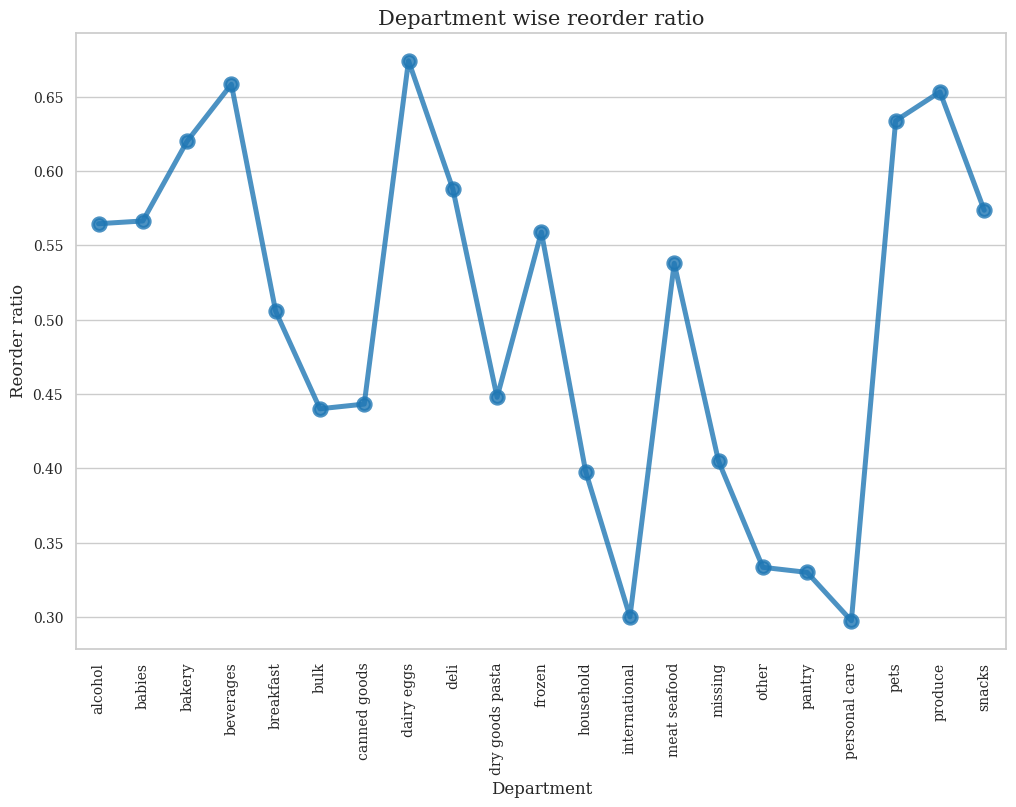

In [51]:
grouped_df = analysis_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x='department', y='reordered', data=grouped_df, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


*   personal care and international department have the lowest reorder ratio
*   Dairy eggs, beverages and produce are among the departments with the highest reorder ratio






### _Reordered ratio vs Order of products in which they are added to cart._

<ipython-input-52-d5de38ee8e51>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  analysis_df["add_to_cart_order_mod"].loc[analysis_df["add_to_cart_order_mod"]>40] = 40
<ipython-input-52-d5de38ee8e51>:2: SettingWithCopyWarning: 
A value is tr

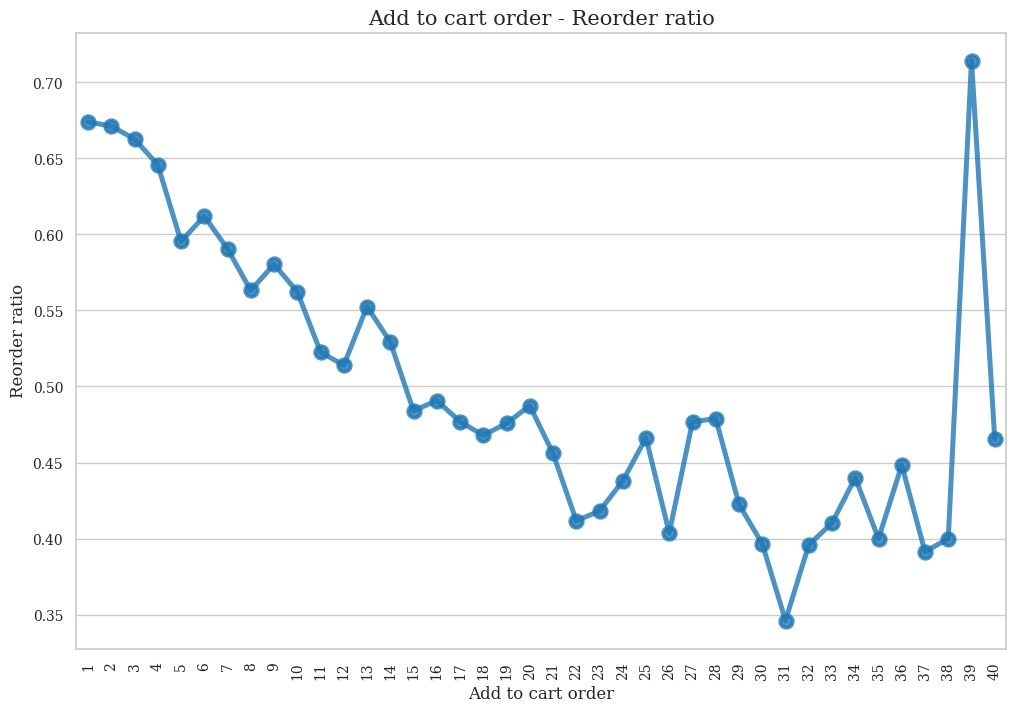

In [52]:
analysis_df["add_to_cart_order_mod"] = analysis_df["add_to_cart_order"].copy()
analysis_df["add_to_cart_order_mod"].loc[analysis_df["add_to_cart_order_mod"]>40] = 40

grouped_df_1 = analysis_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x = 'add_to_cart_order_mod', y = 'reordered', data = grouped_df_1 , alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Add to Cart order refers to the order in which the products were added to the cart. So, the above plot shows that the products which are added to the cart earlier also have the higher reordering ratio

### _Logistic Regression_

In [53]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Fill missing values for 'days_since_prior_order'
data = analysis_df.copy()
data['days_since_prior_order'] = data['days_since_prior_order'].fillna(0)

# Map aisle_id to aisle names for dummy column renaming
aisle_mapping = dict(zip(data['aisle_id'], data['aisle']))
department_mapping = dict(zip(data['department_id'], data['department']))

# Perform one-hot encoding for categorical variables
encoded_data = pd.get_dummies(data, columns=['aisle_id', 'department_id'], drop_first=True)

# Rename aisle_id and department dummy columns with actual aisle and department
encoded_data.rename(columns=lambda x: f"aisle_{aisle_mapping[int(x.split('_')[-1])]}"
                    if x.startswith('aisle_id_') and x.split('_')[-1].isdigit() else x, inplace=True)

encoded_data.rename(columns=lambda x: f"department_{department_mapping[int(x.split('_')[-1])]}"
                    if x.startswith('department_id_') and x.split('_')[-1].isdigit() else x, inplace=True)

X = encoded_data.drop(columns=['reordered', 'product_name', 'department', 'aisle', 'eval_set'])
y = encoded_data['reordered']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression with L1 penalty for feature selection
logistic_model_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=2000)
logistic_model_l1.fit(X_train, y_train)

selector = SelectFromModel(logistic_model_l1, prefit=True)
selected_features = X_train.columns[selector.get_support()]

# Transform training and test sets based on selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train logistic regression on selected features
logistic_model_selected = LogisticRegression(max_iter=500, random_state=42)
logistic_model_selected.fit(X_train_selected, y_train)

# Performance Metrics
y_pred_selected = logistic_model_selected.predict(X_test_selected)
y_pred_proba_selected = logistic_model_selected.predict_proba(X_test_selected)[:, 1]

# Performance metrics
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test, y_pred_proba_selected)

# metrics
performance_selected = {
    "Accuracy": accuracy_selected,
    "Precision": precision_selected,
    "Recall": recall_selected,
    "F1 Score": f1_selected,
    "ROC-AUC": roc_auc_selected
}
print("Performance Metrics for Logistic Regression (Selected Features):")
print(performance_selected)

# Extract coefficients for selected features
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': logistic_model_l1.coef_[0][selector.get_support()]
})
importance_df['Importance'] = importance_df['Coefficient'].abs()

# Sort features by importance
top_features = importance_df.sort_values(by='Importance', ascending=False).head(15)
print("\nTop 15 Most Important Features:")
print(top_features)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Performance Metrics for Logistic Regression (Selected Features):
{'Accuracy': 0.7022666666666667, 'Precision': 0.7261419249592169, 'Recall': 0.800044933722759, 'F1 Score': 0.7613041154462854, 'ROC-AUC': 0.7531905853755838}

Top 15 Most Important Features:
                         Feature  Coefficient  Importance
56               aisle_digestion    -1.282348    1.282348
75   aisle_baking supplies decor    -1.158857    1.158857
78     aisle_baby bath body care    -1.113326    1.113326
94     aisle_trail mix snack mix     1.094117    1.094117
80       aisle_spices seasonings    -1.009148    1.009148
48             aisle_white wines     0.995468    0.995468
103     department_personal care    -0.990009    0.990009
104            department_pantry    -0.900828    0.900828
64                    aisle_milk     0.821108    0.821108
72        aisle_breakfast bakery     0.807311    0.807311
108         department_household    -0.802008    0.802008
84               aisle_skin care     0.801748   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Metrics Explanation Based on Your Example**

---

## **1. Accuracy (70.27%)**
- **Definition**: The proportion of correctly predicted observations (both reordered and not-reordered products) out of the total observations.
- **Formula**:
  \[
  \text{Accuracy} = \frac{\text{True Positives (TP)} + \text{True Negatives (TN)}}{\text{Total Observations}}
  \]

### **What It Means**
- **70.27% Accuracy**: This means that the model correctly predicts reorder behavior for about **70% of all products**.
- This includes:
  - **True Positives (TP)**: Products that were reordered and correctly predicted as reordered.
  - **True Negatives (TN)**: Products that were not reordered and correctly predicted as not-reordered.

### **Example**
- Out of 1,000 products, the model correctly predicts:
  - **Reordered Products** (TP): 300.
  - **Not-Reordered Products** (TN): 402.
- The remaining 298 products are either:
  - **False Positives (FP)**: Products incorrectly predicted as reordered.
  - **False Negatives (FN)**: Products incorrectly predicted as not-reordered.

---

## **2. Precision (72.62%)**
- **Definition**: The proportion of predicted reordered products that were actually reordered.
- **Formula**:
  \[
  \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
  \]

### **What It Means**
- **72.62% Precision**: Of all the products the model predicted to be reordered, **72.62% were actually reordered**.
- This indicates the model does a reasonable job at minimizing **false positives** (products it incorrectly predicted as reordered).

### **Example**
- If the model predicts 400 products to be reordered:
  - **True Positives (TP)**: 300 (actually reordered).
  - **False Positives (FP)**: 100 (not reordered but predicted as reordered).
- Precision is:
  \[
  \text{Precision} = \frac{300}{300 + 100} = 72.62\%
  \]

---

## **3. Recall (79.98%)**
- **Definition**: The proportion of actual reordered products that were correctly predicted by the model.
- **Formula**:
  \[
  \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
  \]

### **What It Means**
- **79.98% Recall**: The model successfully identifies **79.98% of all reordered products**, indicating strong sensitivity.
- It minimizes **false negatives** (products that were reordered but incorrectly predicted as not-reordered).

### **Example**
- Out of 375 actual reordered products:
  - **True Positives (TP)**: 300 (correctly predicted as reordered).
  - **False Negatives (FN)**: 75 (actually reordered but missed by the model).
- Recall is:
  \[
  \text{Recall} = \frac{300}{300 + 75} = 79.98\%
  \]

---

## **4. F1 Score (76.13%)**
- **Definition**: The harmonic mean of precision and recall, balancing the trade-off between the two.
- **Formula**:
  \[
  F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  \]

### **What It Means**
- **76.13% F1 Score**: This indicates a balance between the model’s ability to minimize **false positives** (precision) and **false negatives** (recall).
- The F1 score reflects the model's overall handling of predictions for reordered products.

### **Example**
- Using Precision = 72.62% and Recall = 79.98%:
  \[
  F1 = 2 \times \frac{0.7262 \times 0.7998}{0.7262 + 0.7998} = 76.13\%
  \]

---

## **5. ROC-AUC (75.36%)**
- **Definition**: Measures the model’s ability to distinguish between reordered and not-reordered products across all classification thresholds.
- **Formula**:
  \[
  \text{ROC-AUC} = \frac{\text{True Positive Rate (TPR)}}{\text{False Positive Rate (FPR)}}
  \]

### **What It Means**
- **75.36% ROC-AUC**: The model performs **75.36% better than random guessing** in distinguishing reordered and not-reordered products.
- A higher AUC means the model ranks reordered products higher than not-reordered products, regardless of the threshold.

### **Example**
- If you randomly pick two products:
  - One reordered.
  - One not-reordered.
- There’s a **75.36% chance** that the model will correctly rank the reordered product as more likely to be reordered.

---

## **Summary of Metrics**

| **Metric**        | **What It Means**                                                                            |
|--------------------|---------------------------------------------------------------------------------------------|
| **Accuracy**      | The model correctly predicts reorder behavior for **70.27%** of all products.                |
| **Precision**     | Of all products predicted to be reordered, **72.62%** were actually reordered.               |
| **Recall**        | The model successfully identifies **79.98%** of all actual reordered products.               |
| **F1 Score**      | A balance between precision and recall, showing the model handles predictions **relatively well**. |
| **ROC-AUC**       | The model performs **75.36% better than random guessing** in distinguishing reordered products. |


### Insights from Metrics
- The model demonstrates good overall performance, particularly with high recall, meaning it rarely misses reordered products.
- Slightly lower precision suggests the model may classify some non-reordered products as reordered, which is acceptable if the focus is customer satisfaction (e.g., over-recommending reorders).

---

### Top 15 Most Influential Features
The most impactful features in predicting reorders are determined by the absolute value of their coefficients:
- **Positive Coefficients**: Features that increase the likelihood of reorder.
- **Negative Coefficients**: Features that decrease the likelihood of reorder.

#### Positive Features:
1. **`aisle_trail mix snack mix` (1.09)**:
   - Snacks are often reordered due to regular consumption patterns.
2. **`aisle_breakfast bakery` (0.86)**:
   - Bakery goods are perishable and reordered frequently.
3. **`aisle_milk` (0.83)**:
   - Milk is a staple item and has a short consumption cycle.

#### Negative Features:
1. **`aisle_digestion` (-1.28)**:
   - Digestion aids are niche products and infrequently reordered.
2. **`aisle_baking supplies decor` (-1.15)**:
   - Baking supplies have a long shelf life and are not frequently replenished.
3. **`aisle_baby bath body care` (-1.13)**:
   - Baby care items cater to a specific demographic and have less frequent reorder patterns.

---

### Statistical Insights

#### Consumer Behavior:
- Customers tend to reorder staple items like milk, snacks, and bakery goods frequently due to their perishability and high usage rates.
- Specialty products such as digestion aids and baby care items show fewer reorders, reflecting their niche demand or specific use cases.

#### Aisle-Level Trends:
- **High Reorder Aisles**:
  - Products in aisles like milk, snacks, and bakery goods dominate reorder behavior.
- **Low Reorder Aisles**:
  - Aisles like digestion aids and baking supplies reflect lower reorder rates, likely due to occasional or one-time purchases.

#### Department-Level Trends:
- Departments like **personal care** and **pantry** have significant coefficients, suggesting consistent reorder patterns for everyday essentials.
- Departments related to household and paper goods display moderate reorder tendencies, aligning with occasional replenishment cycles.

---

### Actionable Insights

#### 1. Inventory Optimization:
- Prioritize stock management for high-reorder aisles (e.g., milk, snacks) to ensure consistent availability.
- For low-reorder aisles (e.g., baking supplies, baby care), optimize inventory by managing stock levels to reduce waste.

#### 2. Targeted Marketing:
- Use reorder likelihood to personalize recommendations:
  - Promote high-reorder items for repeat purchases.
  - Encourage reorders for low-coefficient aisles through discounts, bundles, or loyalty programs.

#### 3. Customer Retention:
- For customers purchasing high-reorder items, ensure consistent availability and incentivize loyalty with reorder reminders.
- Analyze purchase patterns of customers in low-reorder aisles and suggest complementary or alternative products to increase retention.

---

### Summary
This logistic regression analysis provides valuable insights into consumer reorder behavior:
- Staples like milk and snacks dominate reorder trends.
- Specialty or occasional-use products show less frequent reordering.
These findings can guide inventory management, targeted marketing, and customer retention strategies to optimize business outcomes.


Confusion Matrix:


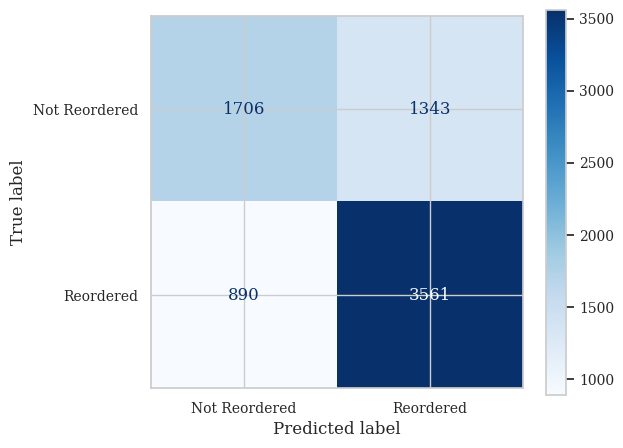

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred_selected)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Reordered", "Reordered"])
disp.plot(cmap='Blues')
print(f"Confusion Matrix:")


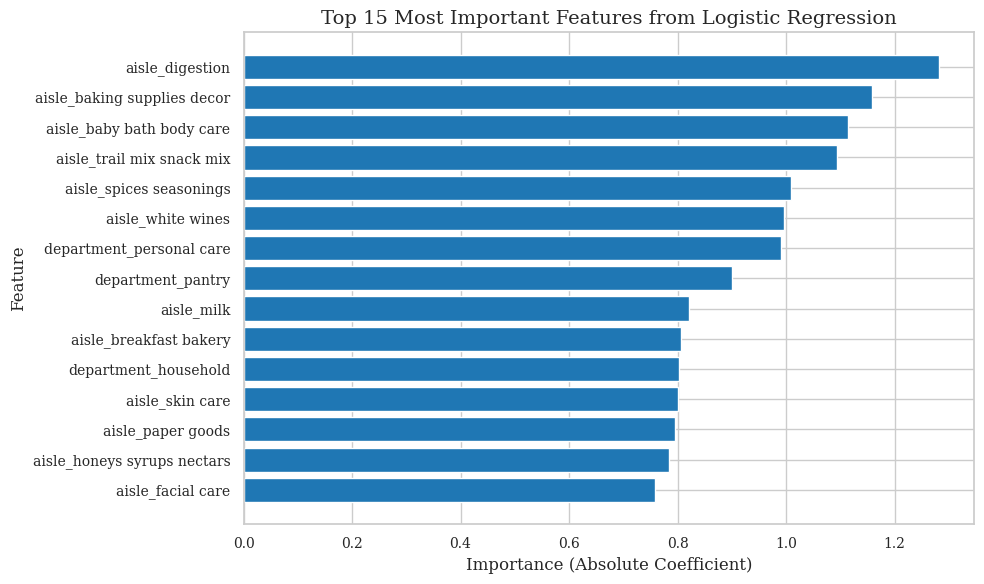

In [55]:
import matplotlib.pyplot as plt

# Plot the top 15 most important features
top_15_features = top_features.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_15_features['Feature'], top_15_features['Importance'], align='center')
plt.xlabel('Importance (Absolute Coefficient)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Most Important Features from Logistic Regression', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

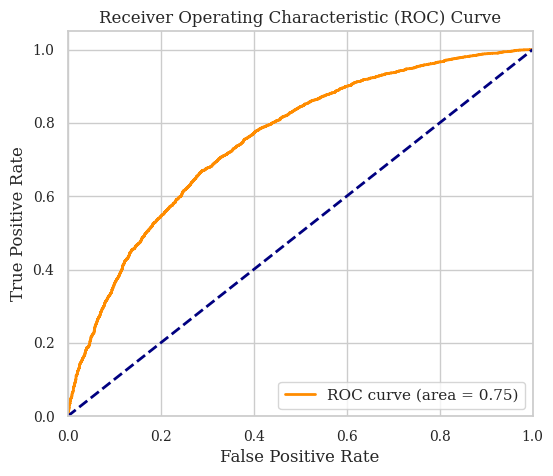

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_selected)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### _Decision Trees_

In [57]:
analysis_df=pd.read_csv('analysis.csv')

- The below code uses pandas' pd.cut() to transform two continuous numerical columns (order hour of day and days since prior order) into categorical bins with descriptive labels.
- For order hours, it creates four time periods (Night, Morning, Afternoon, Evening) by dividing the 24-hour day into specific ranges, and for days between orders, it creates categories like '1 week', '2 weeks', '1 month', and 'over 1 month'.

In [58]:

import pandas as pd

bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
analysis_df['order_hour_of_day_bin'] = pd.cut(analysis_df['order_hour_of_day'], bins=bins, labels=labels)

bins = [0, 7, 14, 30, analysis_df['days_since_prior_order'].max()+1]
labels = ['1 week', '2 weeks', '1 month', 'over 1 month']
analysis_df['days_since_prior_order_bin'] = pd.cut(analysis_df['days_since_prior_order'], bins=bins, labels=labels)


analysis_df = analysis_df.drop(['order_hour_of_day', 'days_since_prior_order'], axis=1)


In [59]:
def preprocess_dataframe(df):
    """
    Preprocess DataFrame by dropping NaN values and encoding categorical variables

    Parameters:
    df (pandas.DataFrame): Input DataFrame to preprocess

    Returns:
    pandas.DataFrame: Preprocessed and encoded DataFrame
    """
    df_processed = df.copy()
    df_processed = df_processed.dropna()
    encoding_cols = ['aisle_id', 'department_id', 'order_hour_of_day_bin', 'days_since_prior_order_bin']
    df_encoded = pd.get_dummies(
        df_processed,
        columns=encoding_cols,
        drop_first=True
    )
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = pd.to_numeric(
                df_encoded[col],
                errors='coerce'
            ).fillna(0)

    return df_encoded

In [60]:
from sklearn.model_selection import train_test_split

def split_data(analysis_df_encoded):
    X = analysis_df_encoded.drop(columns=['reordered', 'order_number','user_id','order_id'])
    y = analysis_df_encoded['reordered'].astype(int)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    return X_train, X_test, y_train, y_test


In [61]:
analysis_df_encoded = preprocess_dataframe(analysis_df)
X_train, X_test, y_train, y_test = split_data(analysis_df_encoded)


Full Decision Tree Accuracy: 0.5648

Classification Report:
               precision    recall  f1-score   support

Not Reordered       0.42      0.43      0.42      1708
    Reordered       0.65      0.65      0.65      2874

     accuracy                           0.56      4582
    macro avg       0.54      0.54      0.54      4582
 weighted avg       0.57      0.56      0.57      4582



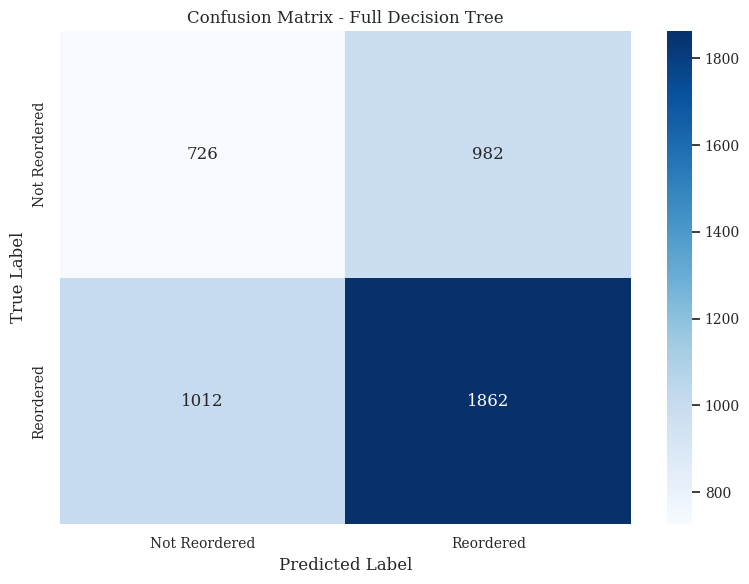


Top 10 Feature Importances:
                                Feature  Importance
0                            product_id    0.313755
1                     add_to_cart_order    0.143593
6                             order_dow    0.127942
160       order_hour_of_day_bin_Morning    0.029810
161     order_hour_of_day_bin_Afternoon    0.029767
163  days_since_prior_order_bin_2 weeks    0.025767
151                    department_id_13    0.019893
162       order_hour_of_day_bin_Evening    0.019340
164  days_since_prior_order_bin_1 month    0.016991
29                          aisle_id_24    0.007942


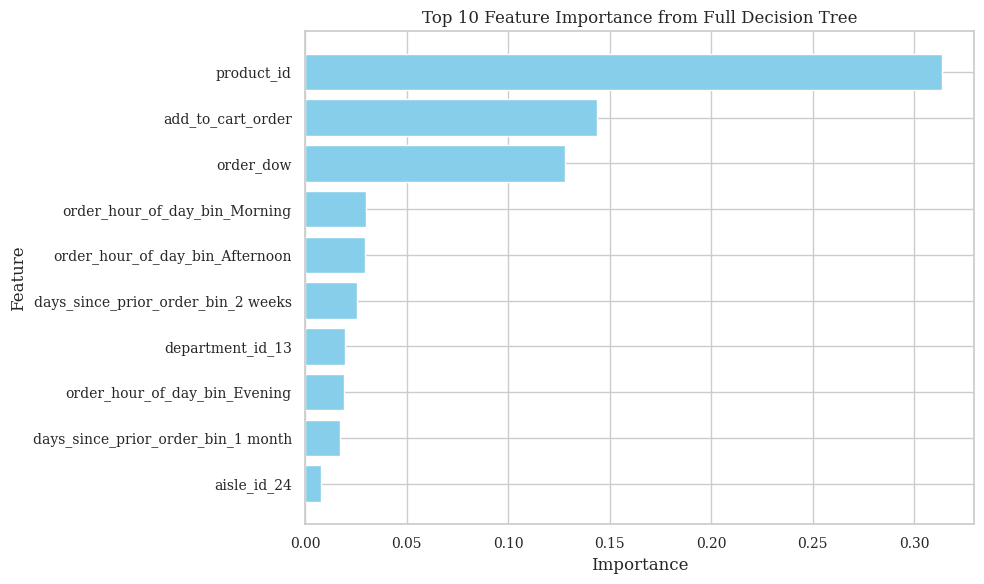


Total number of nodes in the tree: 12045
Tree depth: 58


In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def create_full_decision_tree_with_accuracy(X_train, X_test, y_train, y_test):
    """
    Create a full Decision Tree with accuracy calculation:
    - Train a Decision Tree with no max depth
    - Calculate and visualize performance metrics

    Parameters:
    X_train (DataFrame/array): Training features
    X_test (DataFrame/array): Testing features
    y_train (array): Training labels
    y_test (array): Testing labels

    Returns:
    tuple: Containing the full classifier, predictions, accuracy, and feature importance
    """
    clf_full = DecisionTreeClassifier(
        random_state=42,
        criterion='gini',
        min_samples_split=2,
        min_samples_leaf=1
    )
    clf_full.fit(X_train, y_train)
    y_pred = clf_full.predict(X_test)
    accuracy_full_tree = accuracy_score(y_test, y_pred)
    print(f"\nFull Decision Tree Accuracy: {accuracy_full_tree:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Reordered', 'Reordered']))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Reordered', 'Reordered'],
                yticklabels=['Not Reordered', 'Reordered'])
    plt.title('Confusion Matrix - Full Decision Tree')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    feature_importances = clf_full.feature_importances_
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns
    else:
        feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]
    importance_df_ft = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    top_10_features = importance_df_ft.head(10)

    print("\nTop 10 Feature Importances:")
    print(top_10_features)
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Top 10 Feature Importance from Full Decision Tree')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    print(f"\nTotal number of nodes in the tree: {clf_full.tree_.node_count}")
    print(f"Tree depth: {clf_full.get_depth()}")

    return clf_full, y_pred, accuracy_full_tree, importance_df_ft

full_tree_clf, predictions, accuracy_full_tree,importance_df_ft = create_full_decision_tree_with_accuracy(X_train, X_test, y_train, y_test)


- Convert from Dummies back to it's original value for aisles and departments
- The most significant feature by far is product_id at 31.4%, suggesting that specific product identification is the strongest predictor of reordering. This is followed by add_to_cart_order at 14.4% and order_dow (day of week) at 12.8%, indicating that the specific product, its placement in the cart, and the day of purchase are crucial factors in determining whether an item will be reordered.
- The remaining features play smaller but still meaningful roles, including time-related features like order_hour_of_day bins (Morning, Afternoon, Evening) and days_since_prior_order bins (2 weeks, 1 month), along with product categories like pantry and fresh fruits. These features contribute to the model's nuanced understanding of reordering patterns, with each adding a small but important piece of information to the predictive model.

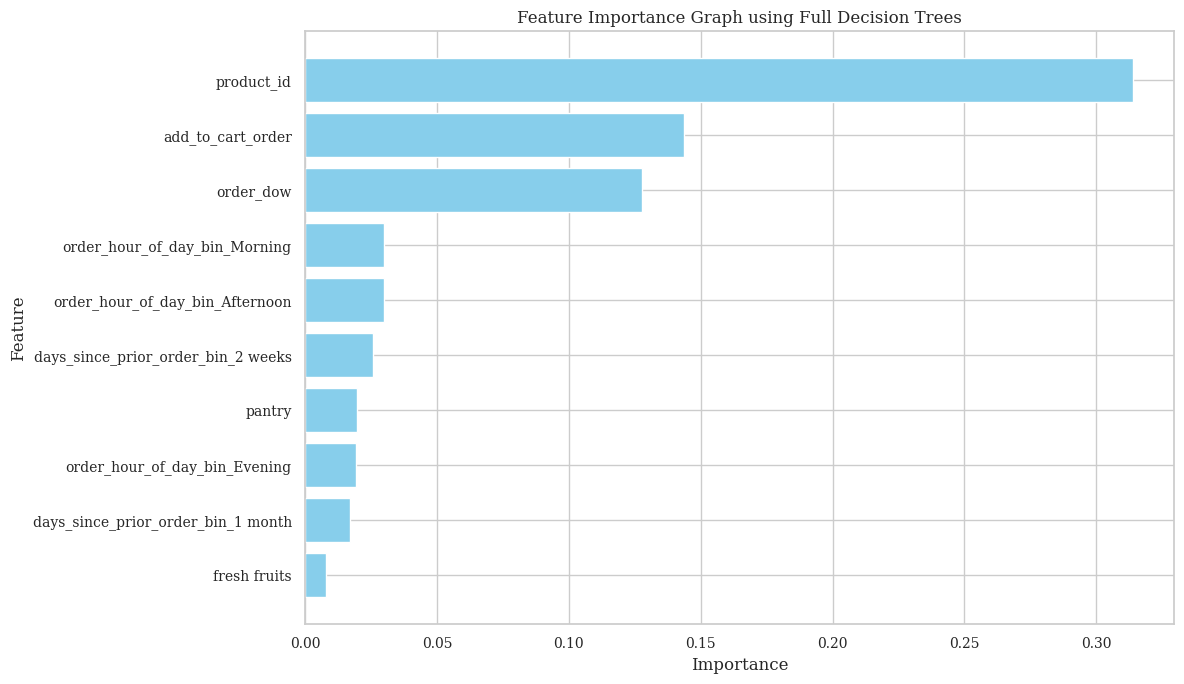

Updated Feature Importances:
                                Feature  Importance
0                            product_id    0.313755
1                     add_to_cart_order    0.143593
6                             order_dow    0.127942
160       order_hour_of_day_bin_Morning    0.029810
161     order_hour_of_day_bin_Afternoon    0.029767
163  days_since_prior_order_bin_2 weeks    0.025767
0                                pantry    0.019893
162       order_hour_of_day_bin_Evening    0.019340
164  days_since_prior_order_bin_1 month    0.016991
0                          fresh fruits    0.007942


In [63]:

top_features = importance_df_ft.head(10)

# Process department features
department_features = top_features[top_features['Feature'].str.contains('department_id')].copy()
department_features['department_id'] = department_features['Feature'].str.extract(r'department_id_(\d+)').astype(int)
department_features = department_features.merge(departments, on='department_id', how='left')
department_features['Feature'] = department_features['department']

# Process aisle features
aisle_features = top_features[top_features['Feature'].str.contains('aisle_id')].copy()
aisle_features['aisle_id'] = aisle_features['Feature'].str.extract(r'aisle_id_(\d+)').astype(int)
aisle_features = aisle_features.merge(aisles, on='aisle_id', how='left')
aisle_features['Feature'] = aisle_features['aisle']

# Combine and update features
updated_features = pd.concat([
    department_features[['Feature', 'Importance']],
    aisle_features[['Feature', 'Importance']],
    top_features[~top_features['Feature'].str.contains('department_id|aisle_id')]
])

# Sort by importance
updated_features = updated_features.sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(12, 7))
plt.barh(updated_features['Feature'], updated_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Graph using Full Decision Trees')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print("Updated Feature Importances:")
print(updated_features)

- This code implements a decision tree classifier to predict whether an item will be reordered, using a systematic approach to find the optimal tree depth through cross-validation, which helps prevent overfitting by testing different tree complexity levels.
- The script includes two main functions: find_optimal_decision_tree_depth() which tests various tree depths to find the most accurate model, and analyze_decision_tree() which trains the optimal model, evaluates its performance, generates a confusion matrix, visualizes the decision tree, and ranks feature importances.


Optimal Decision Tree Accuracy: 0.6576

Optimal Tree Depth: 5

Classification Report:
               precision    recall  f1-score   support

Not Reordered       0.60      0.24      0.35      1708
    Reordered       0.67      0.90      0.77      2874

     accuracy                           0.66      4582
    macro avg       0.63      0.57      0.56      4582
 weighted avg       0.64      0.66      0.61      4582



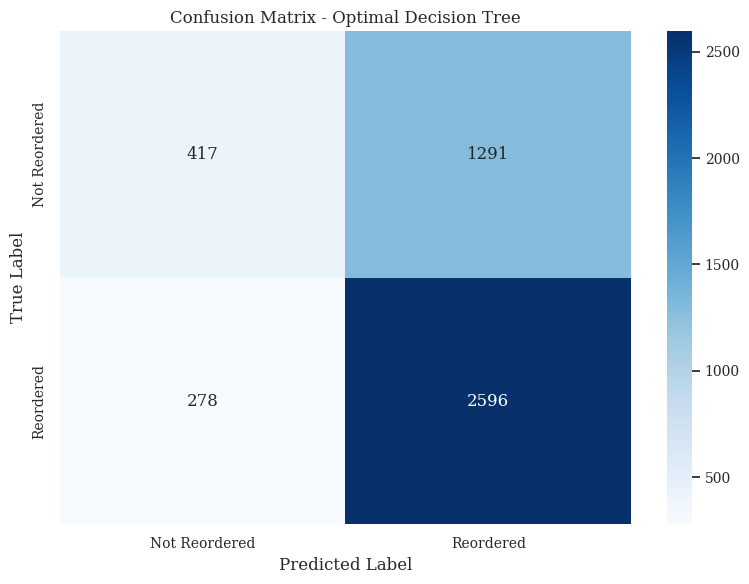

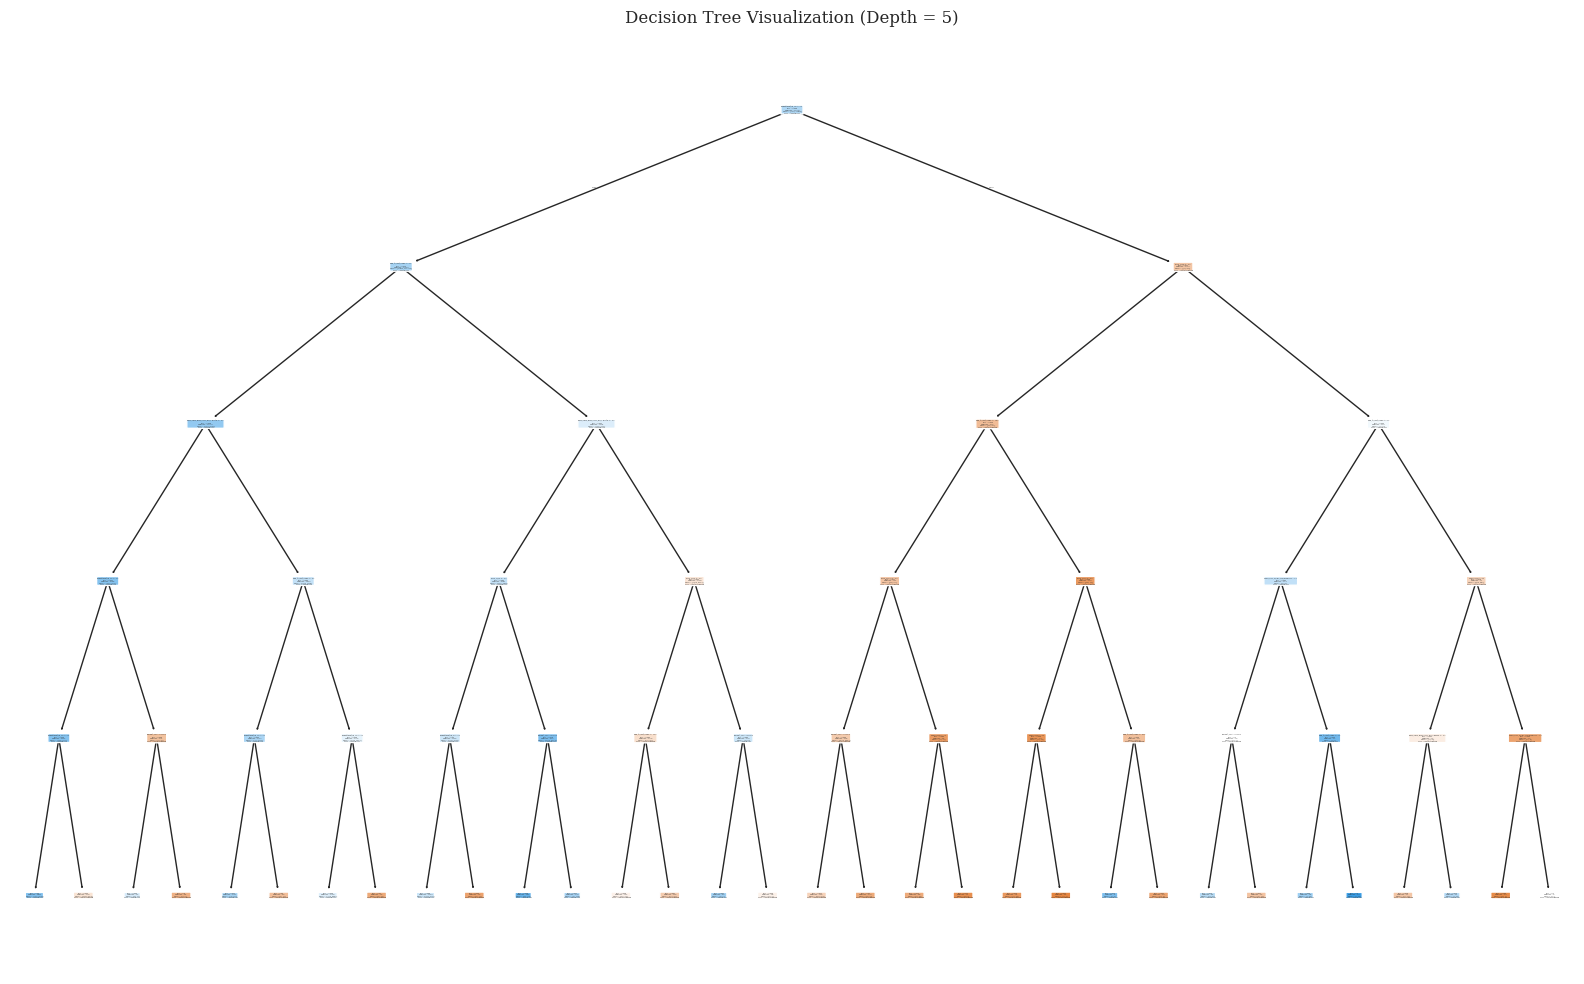


Top 10 Feature Importances:
                                Feature  Importance
1                     add_to_cart_order    0.281011
151                    department_id_13    0.255932
164  days_since_prior_order_bin_1 month    0.190919
155                    department_id_17    0.064622
149                    department_id_11    0.054676
29                          aisle_id_24    0.043473
0                            product_id    0.027628
144                     department_id_6    0.021561
93                          aisle_id_88    0.017986
153                    department_id_15    0.013871


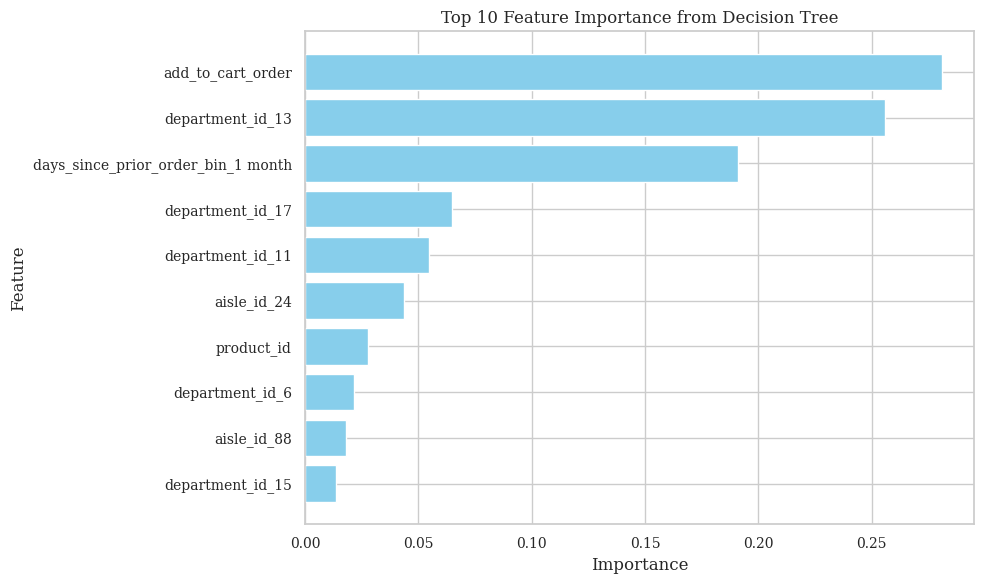

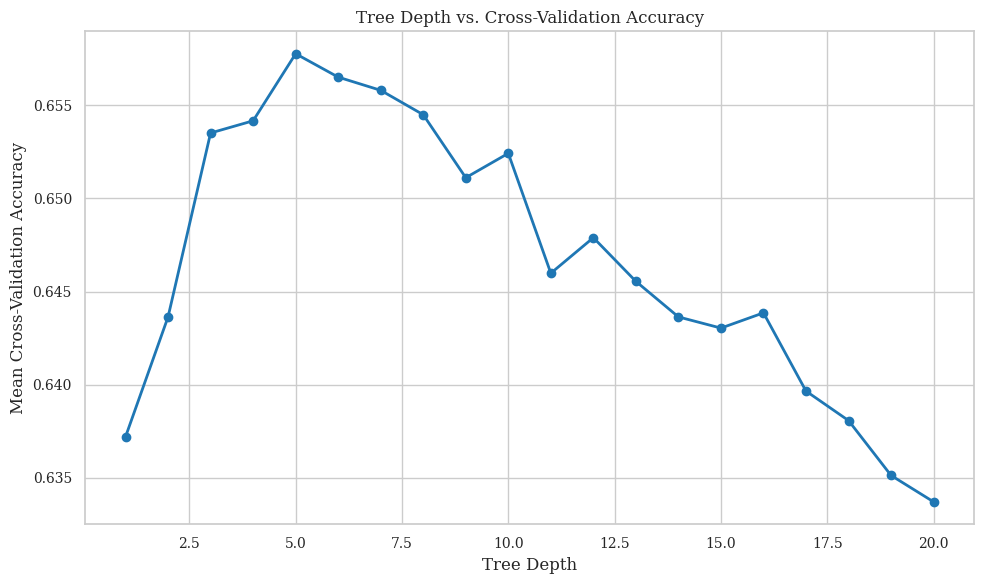

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def find_optimal_decision_tree_depth(X_train, y_train, max_depth=20, cv=5):
    """
    Find the optimal depth for a Decision Tree using cross-validation.

    Parameters:
    X_train (DataFrame/array): Training features
    y_train (array): Training labels
    max_depth (int): Maximum depth to explore
    cv (int): Number of cross-validation folds

    Returns:
    tuple: Optimal depth and corresponding cross-validation scores
    """
    depths = range(1, max_depth + 1)
    scores = []

    for depth in depths:
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        score = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy').mean()
        scores.append(score)

    # Determine the optimal depth
    optimal_depth = depths[scores.index(max(scores))]

    return optimal_depth, scores

def analyze_decision_tree(X_train, X_test, y_train, y_test, optimal_depth):
    """
    Analyze Decision Tree performance with optimal depth.

    Parameters:
    X_train (DataFrame/array): Training features
    X_test (DataFrame/array): Testing features
    y_train (array): Training labels
    y_test (array): Testing labels
    optimal_depth (int): Optimal tree depth

    Returns:
    tuple: Classifier, predictions, and feature importance DataFrame
    """
    clf_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
    clf_optimal.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = clf_optimal.predict(X_test)
    accuracy_optimal_tree = accuracy_score(y_test, y_pred)

    print(f"\nOptimal Decision Tree Accuracy: {accuracy_optimal_tree:.4f}")
    print(f"\nOptimal Tree Depth: {optimal_depth}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Reordered', 'Reordered']))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Reordered', 'Reordered'],
                yticklabels=['Not Reordered', 'Reordered'])
    plt.title('Confusion Matrix - Optimal Decision Tree')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(16, 10))
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns
    else:
        feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

    plot_tree(
        clf_optimal,
        feature_names=feature_names,
        class_names=['Not Reordered', 'Reordered'],
        filled=True,
        rounded=True
    )
    plt.title(f"Decision Tree Visualization (Depth = {optimal_depth})")
    plt.tight_layout()
    plt.show()

    feature_importances = clf_optimal.feature_importances_

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)


    top_10_features = importance_df.head(10)
    print("\nTop 10 Feature Importances:")
    print(top_10_features)

    plt.figure(figsize=(10, 6))
    plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Top 10 Feature Importance from Decision Tree')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    return clf_optimal, y_pred, accuracy_optimal_tree, importance_df

# Main execution
# Find optimal depth
optimal_depth, depth_scores = find_optimal_decision_tree_depth(X_train, y_train)

# Analyze Decision Tree with optimal depth
clf_optimal, predictions, accuracy_optimal_tree,importance_df = analyze_decision_tree(
    X_train, X_test, y_train, y_test, optimal_depth
)

# Optional: Plot depth vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(depth_scores) + 1), depth_scores, marker='o')
plt.title('Tree Depth vs. Cross-Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.tight_layout()
plt.show()


- The top three most important features are add_to_cart_order (28.1%), pantry product category (25.6%), and days_since_prior_order_bin_1 month (19.1%), which suggests that the order of items in the cart, whether they're pantry items, and the time between orders are the most critical factors in predicting whether an item will be reordered.
- The remaining features like household (6.5%), personal care (5.5%), and specific product categories such as fresh fruits, product_id, international, spreads, and canned goods play smaller but still significant roles in the reordering prediction, indicating that product type and specific product characteristics contribute to the model's decision-making process.

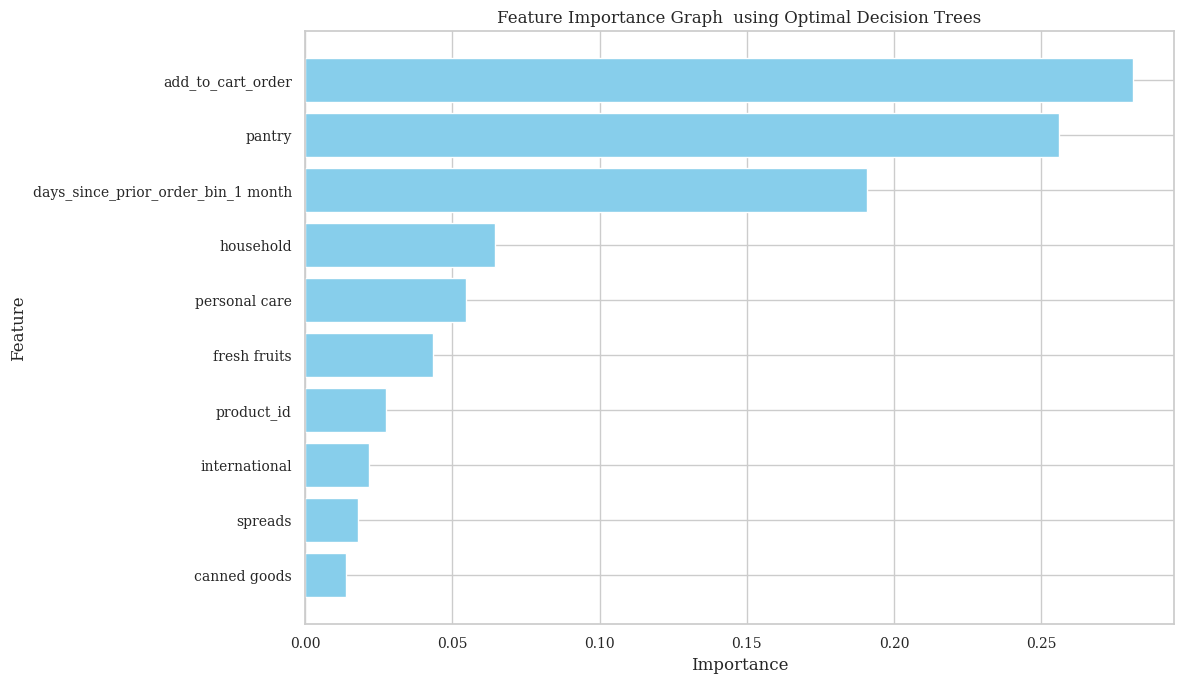

Updated Feature Importances:
                                Feature  Importance
1                     add_to_cart_order    0.281011
0                                pantry    0.255932
164  days_since_prior_order_bin_1 month    0.190919
1                             household    0.064622
2                         personal care    0.054676
0                          fresh fruits    0.043473
0                            product_id    0.027628
3                         international    0.021561
1                               spreads    0.017986
4                          canned goods    0.013871


In [65]:

top_features = importance_df.head(10)

# Process department features
department_features = top_features[top_features['Feature'].str.contains('department_id')].copy()
department_features['department_id'] = department_features['Feature'].str.extract(r'department_id_(\d+)').astype(int)
department_features = department_features.merge(departments, on='department_id', how='left')
department_features['Feature'] = department_features['department']

# Process aisle features
aisle_features = top_features[top_features['Feature'].str.contains('aisle_id')].copy()
aisle_features['aisle_id'] = aisle_features['Feature'].str.extract(r'aisle_id_(\d+)').astype(int)
aisle_features = aisle_features.merge(aisles, on='aisle_id', how='left')
aisle_features['Feature'] = aisle_features['aisle']

# Combine and update features
updated_features = pd.concat([
    department_features[['Feature', 'Importance']],
    aisle_features[['Feature', 'Importance']],
    top_features[~top_features['Feature'].str.contains('department_id|aisle_id')]
])

# Sort by importance
updated_features = updated_features.sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(12, 7))
plt.barh(updated_features['Feature'], updated_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Graph  using Optimal Decision Trees')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print updated features for reference
print("Updated Feature Importances:")
print(updated_features)

#Bagging, Boosting and Random Forest

In [66]:
DTsalesreg_bag=RandomForestRegressor(max_features=166, random_state=42) # Bagging is special case of RF, when we use all features (3 in this case).

# Random forest: Decide the parameters for the new Decision Tree with ensemble
DTsalesreg_RF=RandomForestRegressor(max_features=165, random_state=42)

# Boosting: Decide the parameters for the new Decision Tree with ensemble
DTsalesreg_boost=GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=42)

In [67]:
# Fit the bagging model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_bag.fit(X_train, y_train)

# Fit the random forest model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_RF.fit(X_train, y_train)

# Fit the boosting model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=42)

In [68]:
DTbag_predictions_tr=DTsalesreg_bag.predict(X_test) # predictions for training set

DTRF_predictions_tr=DTsalesreg_RF.predict(X_test) # predictions for training set

DTboost_predictions_tr=DTsalesreg_boost.predict(X_test) # predictions for training set

In [69]:
# How good is this prediction of bagging in training?
regressionSummary(y_test, DTbag_predictions_tr)

# How good is this prediction of random forest in training?
regressionSummary(y_test, DTRF_predictions_tr)

# How good is this prediction of random forest in training?
regressionSummary(y_test,DTboost_predictions_tr)


Regression statistics

               Mean Error (ME) : -0.0016
Root Mean Squared Error (RMSE) : 0.4872
     Mean Absolute Error (MAE) : 0.4262

Regression statistics

               Mean Error (ME) : -0.0022
Root Mean Squared Error (RMSE) : 0.4870
     Mean Absolute Error (MAE) : 0.4257

Regression statistics

               Mean Error (ME) : -0.0008
Root Mean Squared Error (RMSE) : 0.4619
     Mean Absolute Error (MAE) : 0.4326


Boosting has the lowest RMSE value and is the best performing one out of the three

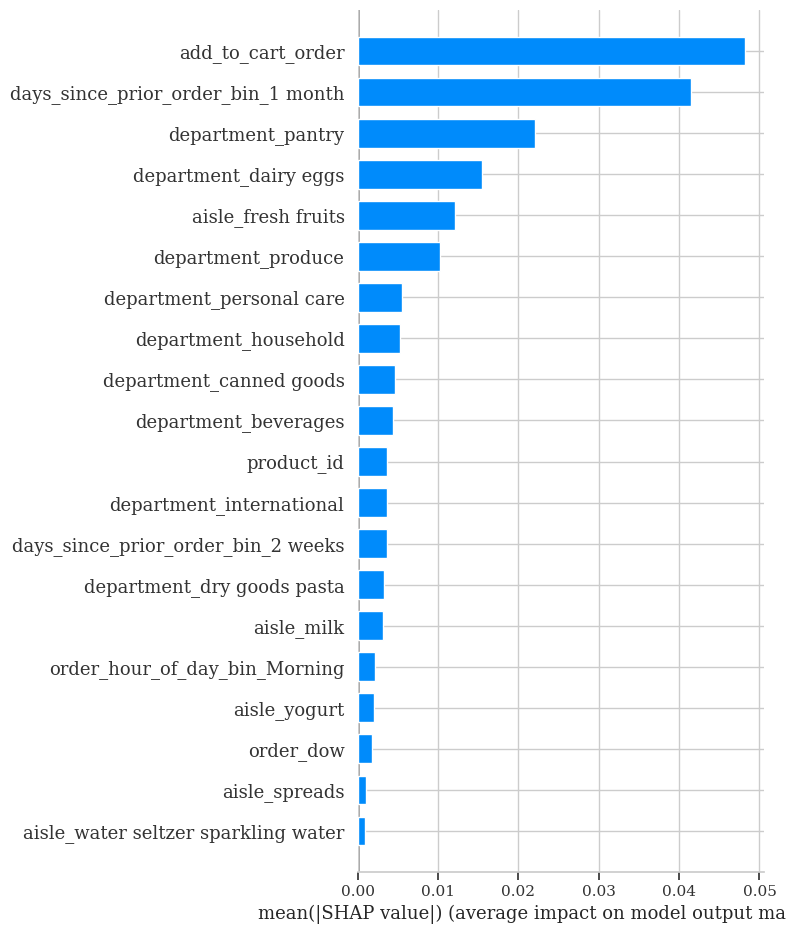

In [87]:

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(DTsalesreg_boost)
shap_values = explainer.shap_values(X_test)

# Prepare feature names
feature_names = X_test.columns.tolist()
for feature in feature_names:
    if feature.startswith('aisle_id_'):
        aisle_id = int(feature.split('_')[-1])
        aisle_name = aisles.loc[aisles['aisle_id'] == aisle_id, 'aisle'].values[0]
        feature_names[feature_names.index(feature)] = f'aisle_{aisle_name}'
    elif feature.startswith('department_id_'):
        department_id = int(feature.split('_')[-1])
        department_name = departments.loc[departments['department_id'] == department_id, 'department'].values[0]
        feature_names[feature_names.index(feature)] = f'department_{department_name}'

# Visualize the feature importance using SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")
plt.show()

Displays the most important variables affecting the chance of a product being reordered or not

In [77]:
column_names = X.columns.tolist()

In [102]:
X_train.columns

Index(['product_id', 'add_to_cart_order', 'product_name', 'department',
       'aisle', 'eval_set', 'order_dow', 'aisle_id_2', 'aisle_id_3',
       'aisle_id_4',
       ...
       'department_id_18', 'department_id_19', 'department_id_20',
       'department_id_21', 'order_hour_of_day_bin_Morning',
       'order_hour_of_day_bin_Afternoon', 'order_hour_of_day_bin_Evening',
       'days_since_prior_order_bin_2 weeks',
       'days_since_prior_order_bin_1 month',
       'days_since_prior_order_bin_over 1 month'],
      dtype='object', length=166)

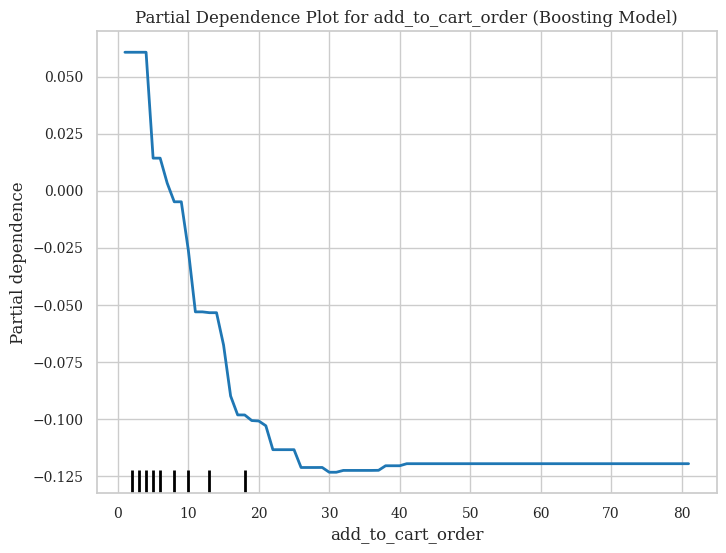

In [99]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Define the feature to plot (e.g., 'add_to_cart_order')
feature_name = "add_to_cart_order"
feature_index = X_train.columns.get_loc(feature_name)  # Get the column index dynamically

# Generate the Partial Dependence Plot for the boosting model
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(DTsalesreg_boost, X_train, [feature_index], ax=ax)

# Customize the plot
ax.set_title(f'Partial Dependence Plot for {feature_name} (Boosting Model)')
ax.set_xlabel(feature_name)
ax.set_ylabel('Partial Dependence')

# Optionally adjust y-axis limits for better visualization
plt.show()


In [74]:


# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(DTsalesreg_boost)
shap_values = explainer.shap_values(X_test)

# Prepare feature names
feature_names = X_test.columns.tolist()
for feature in feature_names:
    if feature.startswith('aisle_id_'):
        aisle_id = int(feature.split('_')[-1])
        aisle_name = aisles.loc[aisles['aisle_id'] == aisle_id, 'aisle'].values[0]
        feature_names[feature_names.index(feature)] = f'aisle_{aisle_name}'
    elif feature.startswith('department_id_'):
        department_id = int(feature.split('_')[-1])
        department_name = departments.loc[departments['department_id'] == department_id, 'department'].values[0]
        feature_names[feature_names.index(feature)] = f'department_{department_name}'

# Create a force plot for the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], feature_names=feature_names)

features like department_produce, add_to_cart_order, and aisle_fresh fruits were most important in the higher predicted value of reorder